Nama : Helmi Saifullah Mansur

Program : Python For Data Science

Kode Peserta : PYTN-KS04-010
# MODEL DEPLOYMENT
## Creating Model for Deployment
### Importing Libraries
Notes: Profiling boleh diinstall atau tidak diinstall. Dalam sesi ini, profiling hanya digunakan menjadi contoh untuk memudahkan analisa.

Lewati cell report = data.profile_report(title='Campus Placement Data - Report', progress_bar=False) Jika memutuskan untuk tidak menggunakan profiling.

In [1]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle

%matplotlib inline

In [3]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

# remove serial number
data.drop('sl_no', axis=1, inplace=True)

### Examing Dataset

In [4]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Kesimpulan

- Kami memiliki data kualifikasi Gender dan Pendidikan
- Kami memiliki semua data kinerja (skor) pendidikan
- Kami memiliki status penempatan dan detail gaji
- Kita dapat mengharapkan nilai nol dalam gaji karena kandidat yang tidak ditempatkan tidak akan memiliki gaji
- Status penempatan adalah variabel target kami sisanya adalah variabel independen kecuali gaji

In [5]:
print('The shape of the data is (row, columns):'+str(data.shape))
print(data.info())

The shape of the data is (row, columns):(215, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB
None


In [6]:
report = data.profile_report(title='Campus Placement Data - Report', progress_bar=False)
report

# Uncomment syntax below to make new html file

report.to_file(output_file='output.html')

In [7]:
report

- 67 Nilai yang hilang dalam Gaji untuk siswa yang tidak ditempatkan. Nilai NaN perlu diisi.
- Data tidak diskalakan. Kolom gaji berkisar antara 200k-940k, kolom numerik lainnya adalah persentase.
- 300k pada Persentil ke-75 berjalan hingga maks 940k, dalam Gaji (skewnwss tinggi). Dengan demikian, outlier pada akhir gaji tinggi.

### Data Cleaning / Handling missing values

In [8]:
data['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',
      data['salary'].isnull().sum(), sep='\n')

Salary column with null values:
0


### Exploring data by each features (optional)

In [9]:
"""
Feature: Gender

Does gender affect placment?
"""

data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


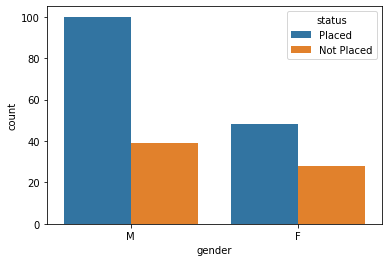

In [10]:
sns.countplot('gender', hue='status', data=data)
plt.show()

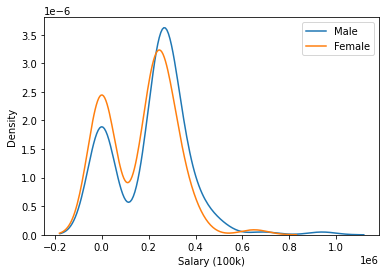

In [11]:
sns.kdeplot(data.salary[data.gender=='M'])
sns.kdeplot(data.salary[data.gender=='F'])
plt.legend(['Male', 'Female'])
plt.xlabel('Salary (100k)')
plt.show()

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


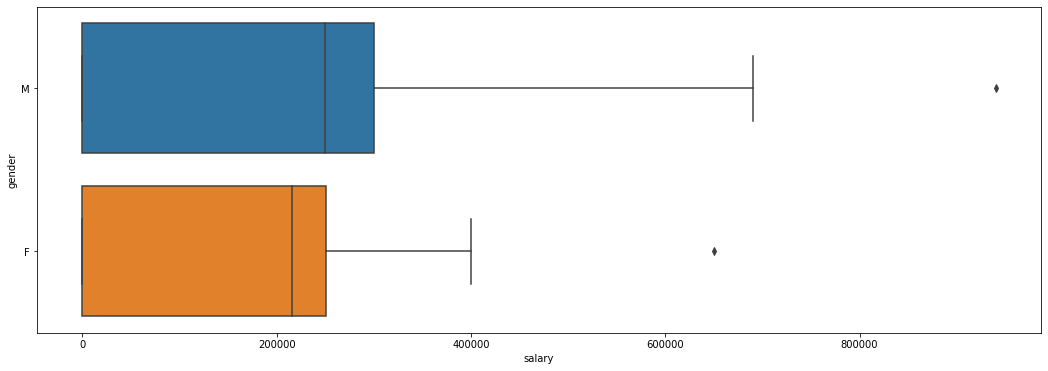

In [12]:
plt.figure(figsize=(18,6))
sns.boxplot('salary', 'gender', data=data)
plt.show()

Wawasan

- Kami memiliki sampel 139 siswa laki-laki dan 76 siswa perempuan.
- 30 siswa perempuan dan 40 siswa laki-laki tidak ditempatkan. Siswa laki-laki memiliki penempatan yang relatif lebih tinggi
- male students are offered slightly greater salary than female on an average

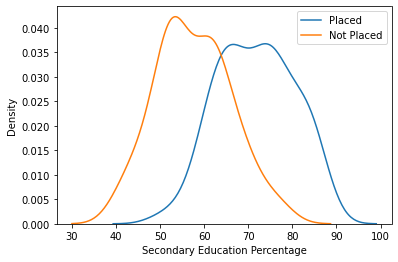

In [13]:
"""
Feature: ssc_p(Secondary Education Percentage), ssc_b(Board of Education)

Does secondary education affect placement?
"""
sns.kdeplot(data.ssc_p[data.status=='Placed'])
sns.kdeplot(data.ssc_p[data.status=='Not Placed'])
plt.legend(['Placed', 'Not Placed'])
plt.xlabel('Secondary Education Percentage')
plt.show()

- Semua siswa dengan Persentase Pendidikan Menengah di atas 90% ditempatkan
- Semua siswa dengan Persentase Pendidikan Menengah di bawah 50% tidak ditempatkan
- Siswa dengan Persentase Pendidikan Menengah yang baik ditempatkan rata-rata.

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


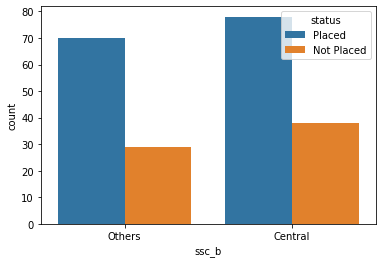

In [14]:
sns.countplot('ssc_b', hue='status', data=data)
plt.show()

Board Of Education tidak banyak mempengaruhi Placement Status.

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


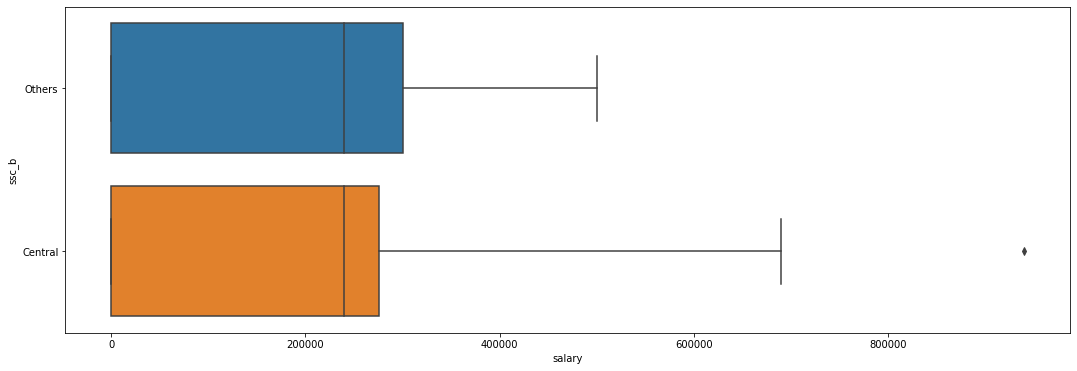

In [15]:
plt.figure(figsize=(18,6))
sns.boxplot('salary', 'ssc_b', data=data)
plt.show()

Outliers terdapat pada keduanya, tetapi siswa dari Central Board mendapatkan pekerjaan bergaji tinggi.

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


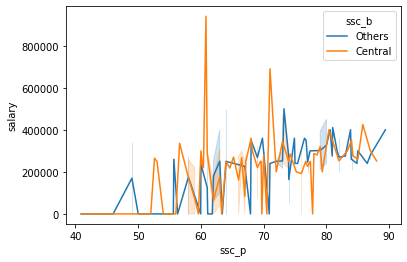

In [16]:
sns.lineplot('ssc_p', 'salary', hue='ssc_b', data=data)
plt.show()

Tidak ada pola khusus (correlation) antara Secondary Education Percentage dan Salary. Board of Education Tidak Mempengaruhi Gaji

Kita dapat membuat grafik sendiri dari sini.

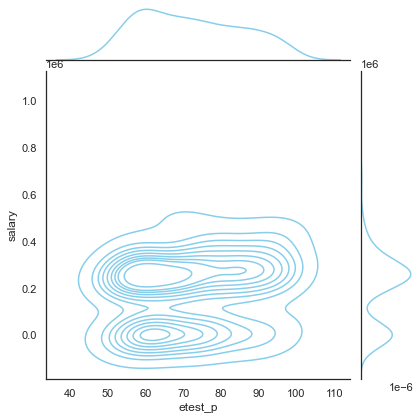

In [17]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style='white', color_codes=True)
sns.jointplot(x=data['etest_p'], y=data['salary'], kind='kde', color='skyblue')

plt.show()

- Sebagian besar kandidat yang mendapat skor sekitar 60 persen mendapat paket yang layak sekitar 3 lakh PA
- Tidak banyak kandidat yang menerima gaji lebih dari 4 lakh PA
- Bagian padat bawah menunjukkan kandidat yang tidak ditempatkan

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

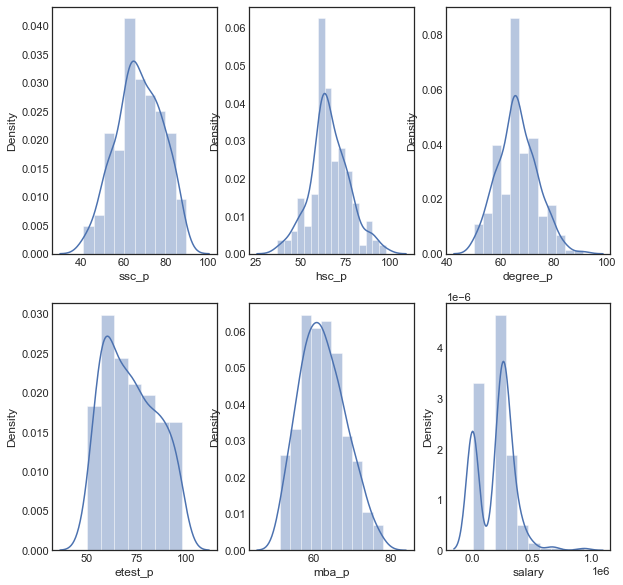

In [18]:
plt.figure(figsize=(15,7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(data['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(data['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(data['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(data['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(data['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(data['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)

- Semua distribusi mengikuti distribusi normal kecuali fitur gaji
- Sebagian besar kinerja pendidikan calon adalah antara 60-80%
- Distribusi gaji mendapat outlier dimana hanya sedikit yang mendapat gaji 7,5L dan 10L PA

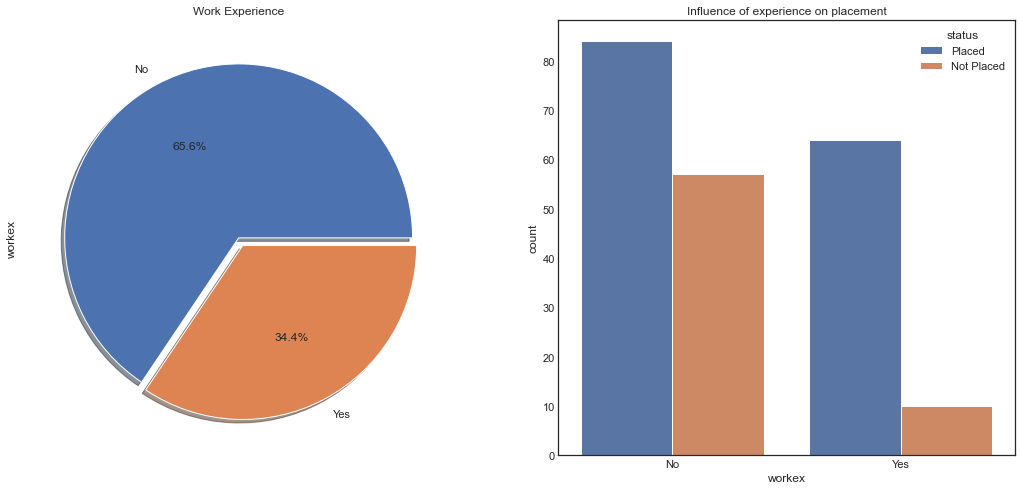

In [19]:
plt.style.use('seaborn-white')
f,ax = plt.subplots(1,2,figsize=(18,8))
data['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',
                                       ax=ax[0],shadow=True)
ax[0].set_title('Work Experience')
sns.countplot(x='workex', hue='status', data=data)
ax[1].set_title('Influence of experience on placement')

plt.show()

- Kami memiliki hampir 66,2% kandidat yang tidak pernah memiliki pengalaman kerja
- Kandidat yang tidak pernah memiliki pengalaman kerja lebih banyak dipekerjakan daripada yang memiliki pengalaman
- Kita dapat menyimpulkan bahwa pengalaman kerja tidak mempengaruhi kandidat dalam proses rekrutmen

### Preprocessing data for classification models

In [20]:
from sklearn.preprocessing import LabelEncoder

object_cols = ['gender','workex','specialisation','status']

label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [21]:
# library import
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [22]:
# seperating features & target
X = data[['ssc_p','hsc_p','degree_p','etest_p']]
y = data['status']

In [23]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=4)

In [24]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print('Accuracy score:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.8153846153846154
              precision    recall  f1-score   support

           0       0.72      0.65      0.68        20
           1       0.85      0.89      0.87        45

   micro avg       0.82      0.82      0.82        65
   macro avg       0.79      0.77      0.78        65
weighted avg       0.81      0.82      0.81        65



In [25]:
# Random forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print('Accuracy score:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.8769230769230769
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.89      0.93      0.91        45

   micro avg       0.88      0.88      0.88        65
   macro avg       0.86      0.84      0.85        65
weighted avg       0.88      0.88      0.88        65



In [26]:
# Logistic regression
LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train, y_train)

y_pred = LogR.predict(X_test)

print('Accuracy score:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.87      0.91      0.89        45

   micro avg       0.85      0.85      0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



### Get ready for deployment
**Pickle**

Modul pickle Python digunakan untuk serializing dan de-serializing struktur objek Python. Objek apa pun dengan Python dapat dibuat pickled sehingga dapat disimpan di disk. Apa yang dilakukan pickle adalah 'serializes' objek terlebih dahulu sebelum menulisnya ke file. Pickling adalah cara untuk mengubah objek python (list, dict, etc.) Menjadi character stream. Idenya adalah bahwa character stream ini berisi semua informasi yang diperlukan untuk merekonstruksi objek dalam skrip python lain.

In [27]:
pickle.dump(random_forest, open('model_classifier.pkl','wb'))

#### Brief intro to HTML & CSS
HTML adalah standard markup language untuk membuat halaman Web

what is HTML?
- HTML stands for Hyper Text Markup Language
- HTML is the standard markup language for creating Web pages
- HTML describes the structure of a Web page
- HTML consists of a series of elements
- HTML elements tell the browser how to display the content
- HTML elements label pieces of content such as "this is a heading", "this is a paragraph", "this is a link", etc.

##### A simple HTML Document
```
<!DOCTYPE html>
<html>
<head>
  <title>Page Title</title>
</head>
<body>

  <h1>My First Heading</h1>
  <p>My first paragraph.</p>

</body>
</html>
```

- ```<!DOCTYPE html>``` mendefinisikan bahwa dokumen ini adalah dokumen HTML5
- ```<html>``` elemen adalah elemen root dari halaman HTML
- ```<head>``` elemen berisi informasi meta tentang halaman HTML
- ```<title>``` elemen menentukan judul untuk halaman HTML (yang ditampilkan di judul browser atau di tab halaman)
- ```<body>``` elemen mendefinisikan badan dokumen, dan merupakan wadah untuk semua konten yang terlihat, seperti headings, paragraphs, images, hyperlinks, tables, lists, dll.
- ```<h1>``` elemen mendefinisikan headingbesar
- The ```<p>``` element mendefinisikan sebuah paragraph

CSS adalah singkatan dari Cascading Style Sheets.

CSS menghemat banyak pekerjaan. CSS dapat mengontrol tata letak beberapa halaman web sekaligus.

**What is CSS?**

Cascading Style Sheets (CSS) digunakan untuk memformat tata letak halaman web.

Dengan CSS, kita dapat mengontrol warna, font, ukuran teks, jarak antar elemen, bagaimana elemen diposisikan dan ditata, gambar latar belakang atau warna latar yang akan digunakan, tampilan yang berbeda untuk perangkat dan ukuran layar yang berbeda, dan banyak lagi.

**Using CSS**

CSS dapat ditambahkan ke dokumen HTML dengan 3 cara:

CSS dapat ditambahkan ke dokumen HTML dengan 3 cara:

Inline - by using the style attribute inside HTML elements
Internal - by using a <style> element in the <head> section
External - by using a <link> element to link to an external CSS file
Cara paling umum untuk menambahkan CSS, adalah menempatkan style dalam file CSS eksternal.

### Creting web app with flask
Pastikan flask sudah terinstall dengan ```pip install flask```.

Minimal Flask application terlihat seperti ini:

In [28]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_word():
    return 'Hello, World'

Jadi apa yang dilakukan kode tersebut?

- Pertama kita mengimpor kelas Flask. Instance dari kelas ini adalah aplikasi WSGI kita.
- Selanjutnya kita membuat instance dari kelas ini. Argumen pertama adalah nama modul atau paket aplikasi. Jika kita menggunakan satu modul (seperti dalam contoh ini), kita harus menggunakan __name__ karena bergantung pada apakah aplikasi tersebut dimulai sebagai aplikasi atau diimpor sebagai modul, namanya akan berbeda ('__main__' versus nama impor sebenarnya). Ini diperlukan agar Flask tahu di mana mencari templates, static files, dan lain-lain.
- Kita kemudian menggunakan dekorator route() untuk memberi tahu Flask, URL apa yang harus mentrigger fungsi kita.
- Fungsi tersebut diberi nama yang juga digunakan untuk menghasilkan URL untuk fungsi tertentu itu, dan mengembalikan pesan yang ingin kita tampilkan di browser pengguna.

Simpan sebagai hello.py atau yang serupa. Pastikan untuk tidak memanggil aplikasi kita flask.py karena ini akan conflict dengan Flask itu sendiri.

Untuk menjalankan aplikasi, kita dapat menggunakan perintah flask atau switch -m python dengan Flask. Sebelum kita dapat melakukannya, kita perlu memberi tahu terminal tentang aplikasi yang akan digunakan dengan mengekspor FLASK_APP environment variable:

```
$ export FLASK_APP=hello.py
$ flask run
 * Running on http://127.0.0.1:5000/

```

di windows:

```
set FLASK_APP=hello.py
$env:FLASK_APP = "hello.py"
flask run

```

### Debug Mode
Script flask sangat bagus untuk memulai server local development, tetapi kita harus merestart secara manual setelah setiap perubahan pada kode kita. Hal itu tidak bagus dan Flask bisa melakukannya dengan lebih baik. Jika kita mengaktifkan debug support, server akan merestart dirinya sendiri pada perubahan kode, dan itu juga akan memberi kita debugger yang berguna jika terjadi kesalahan.

Untuk mengaktifkan semua fitur development (termasuk mode debug) kita dapat mengekspor FLASK_ENV environment variable dan menyetelnya ke development sebelum menjalankan server:

```
$ export FLASK_ENV=development
$ flask run
```

(On Windows you need to use set instead of export.)

Hal tersebut melakukan hal-hal berikut:

- it activates the debugger
- it activates the automatic reloader
- it enables the debug mode on the Flask application.

Kita juga dapat mengontrol mode debug secara terpisah dari environment dengan mengekspor FLASK_DEBUG=1.

### Routing
Aplikasi web modern menggunakan URL yang meaningful untuk membantu pengguna. Pengguna lebih cenderung menyukai halaman dan kembali jika halaman tersebut menggunakan URL yang meaningful yang dapat mereka ingat dan gunakan untuk mengunjungi halaman secara langsung.

Gunakan dekorator route() untuk mengikat fungsi ke URL.

In [29]:
@app.route('/')
def index():
    return 'Index Page'

@app.route('/hello')
def hello():
    return 'Hello, World'

### Variable Rules
Kita dapat menambahkan bagian variabel ke URL dengan menandai bagian dengan <variable_name>. Fungsi kita kemudian menerima masukan sebagai keyword argument. Secara opsional, kita  bisa menggunakan konverter untuk menentukan tipe argumen seperti <converter:variable_name>.

In [30]:
from markupsafe import escape

@app.route('/user/<username>')
def show_user_profile(username):
    # show the user profile for that user
    return 'User %s' % escape(username)

@app.route('/post/<int:post_id>')
def show_post(post_id):
    # show the post with the given id, the id is an integer
    return 'Post %d' % post_id

@app.route('/path/<path:subpath>')
def show_subpath(subpath):
    # show the subpath after /path/
    return 'Subpath %s' % escape(subpath)

### HTTP Methods
Aplikasi web menggunakan metode HTTP yang berbeda saat mengakses URL. Kita harus membiasakan diri dengan metode HTTP saat kita bekerja dengan Flask. Secara default, route hanya menjawab permintaan GET . Kita bisa menggunakan argumen metode dekorator route() untuk menangani metode HTTP yang berbeda.

In [31]:
from flask import request

@app.route('/login', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        return do_the_login()
    else:
        return show_the_login_form()

Jika GET tersedia, Flask secara otomatis menambahkan dukungan untuk metode HEAD dan menangani permintaan HEAD sesuai dengan HTTP RFC. Demikian juga, OPTIONS diterapkan secara otomatis untuk kita.

### Static Files
Aplikasi web dinamis juga membutuhkan file statis. Biasanya dari situlah file CSS dan JavaScript berasal. Idealnya server web kita dikonfigurasi untuk menyajikannya untuk kita , tetapi selama pengembangan, Flask juga dapat melakukannya. Cukup buat folder bernama static dalam paket kita atau di sebelah modul kita dan itu akan tersedia di /static pada aplikasi.

Untuk menghasilkan URL untuk file statis, gunakan endpoint name 'static':

url_for('static', filename='style.css')

File harus disimpan di sistem file sebagai static/style.css.

### Rendering Templates
Membuat HTML dari dalam Python tidaklah menyenangkan, dan sebenarnya cukup rumit karena kita harus melakukan HTML escaping sendiri untuk menjaga keamanan aplikasi. Karena itu Flask mengkonfigurasi template engine Jinja2 untuk kita secara otomatis.

Untuk merender template kita bisa menggunakan metode render_template(). Yang harus kita lakukan adalah memberikan nama template dan variabel yang ingin kita teruskan ke template engine sebagai keyword arguments. Berikut adalah contoh sederhana tentang cara merender template:

In [33]:
from flask import render_template

@app.route('/hello/')
@app.route('/hello/<name>')
def hello(name=None):
    return render_template('hello.html', name=name)

Flask akan mencari templates di folder templates . Jadi, jika aplikasi kita adalah sebuah modul, folder ini berada di sebelah modul tersebut, jika itu sebuah paket, itu sebenarnya ada di dalam packagekita:

Case 1: a module:

In [ ]:
/application.py
/templates
    /hello.html

Case 2: a package:

In [ ]:
/application
    /__init__.py
    /templates
        /hello.html

untuk template, kita dapat menggunakan template Jinja2.

Berikut ini contoh template:

In [35]:
<!doctype html>
<title>Hello from Flask</title>
{% if name %}
  <h1>Hello {{ name }}!</h1>
{% else %}
  <h1>Hello, World!</h1>
{% endif %}

### Make your own flask
Ada beberapa hal yang perlu kita kumpulkan untuk aplikasi web. Dua yang pertama adalah:

- The Python code that will load our model, get user input from a web form, do predictions, return results.
- The HTML templates that flask with render. These allow the user to input their own data and will present the results.

Aplikasi kita pada awalnya akan memiliki struktur seperti ini:

```
H8Deployment/
    ├── model/
    │   └── model_classifier.pkl
    ├── static
    │   └── css
    │        └── style.css
    ├── templates/
    │   └── main.html
    └── app.py
 ```   
 
1. model — Ini berisi kode untuk Machine Learning kita.
2. app.py — Ini berisi Flask API yang menerima detail siswa melalui panggilan GUI atau API, menghitung nilai yang diprediksi berdasarkan model kita dan mengembalikannya.
3. template — Folder ini berisi template HTML (main.html) untuk memungkinkan pengguna memasukkan detail siswa dan menampilkan nilai prediksi.
4. static — Folder ini berisi folder css dengan file style.css yang memiliki stryleyang diperlukan untuk file main.html.

Pertama-tama kita akan membuat app.py dan main.html yang sangat mendasar, untuk mendemonstrasikan cara kerja flask. Kita akan mengembangkannya nanti untuk menyesuaikan dengan kebutuhan kita.

#### app.py
Ini adalah inti dari aplikasi web kita. app.py juga yang akan dijalankan di server Heroku, mengirimkan halaman web dan memproses masukan dari pengguna.

Dalam flask, URL dirutekan ke fungsi yang berbeda. Di sini, kita dapat melihat bahwa membuka URL dasar (mis. www.ardhiraka.com) akan memicu fungsi main(). Fungsi ini hanya menyajikan file main.html, yang lokasinya ditentukan saat aplikasi dibuat. Kita dapat mengatur semua jenis routes untuk logging in, displaying data atau lainnya.

In [ ]:
import flask

app = flask.Flask(__name__, template_folder='templates')

@app.route('/')
def main():
    return(flask.render_template('main.html'))
if __name__ == '__main__':
    app.run()

#### main.html
Seperti inilah tampilan file template saat ini. Yang dilakukannya hanyalah menampilkan pesan sederhana. Kita akan mengeditnya nanti untuk menyesuaikan dengan kebutuhan kita.

```
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>H8 Model Deployment</title>
</head>
<body>
    <h1>Welcome to My First Flask Apps!</h1>
</body>
</html>
```

### Running the test app
Untuk memulai flask di komputer lokal kita, pastikan kita berada di folder H8Deployment dan jalankan perintah: python app.py.

### Editing app.py to load the model
Di bawah ini kita dapat melihat app.py yang dikembangkan. Dengan pickled model, kita tidak perlu mengimpor algoritme sklearn atau apa pun - kita hanya menetapkannya ke variabel - tetapi kita perlu mengimpor paket yang diperlukan. Perhatikan bahwa kita memuat model di bagian atas aplikasi. Artinya, ini hanya akan dimuat ke dalam memori satu kali di server saat kita menerapkannya, daripada dimuat setiap kali kami ingin membuat prediksi.

In [39]:
import numpy as np
import pickle

model = pickle.load(open('model_classifier.pkl', 'rb'))
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Redirecting the API to predicct the result

In [ ]:
@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    int_features = [int(x) for x in flask.request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)

    output = {0: 'not placed', 1: 'placed'}

    return flask.render_template('main.html', prediction_text='Student must be {} to workplace'.format(output[prediction[0]]))

Karena ini adalah request POST , ini akan membaca nilai input dari request.form.values(). Sekarang kita memiliki nilai input dalam variabel int_features, kita akan mengubahnya menjadi sebuah array dan kemudian menggunakan model untuk memprediksinya.

Saat kita mengklik tombol predict di main.html, dia akan memprediksi hasil untuk nilai yang dimasukkan oleh pengguna, kemudian meneruskan variabel output yang dikeluarkan dari model dan mengirimkannya kembali ke template main.html sebagai prediction_text.

Dalam kasus ini, kita perlu membuat aplikasi Flask kita dapat di-debug sehingga kita dapat dengan mudah memperbaikinya ketika masalah datang.

Tambahkan debug=True di app.run.

In [ ]:
if __name__ == "__main__":
    app.run(debug=True)

### Editing the main.html template
Template perlu dikembangkan dengan form. Kode HTML untuk ini ada di bawah.

Komponen penting:

***The form**

```
<form action="{{ url_for('predict') }}" method="post">
```
Atribut ```action``` memberi tahu flask route mana harus dipanggil ketika form disubmit. Dalam aplikasi sederhana ini, kita hanya menginginkan main function . Metode POST memberi tahu fungsi itu bahwa ia harus mengharapkan input dan setelahnya memprosesnya.

***Some input checks***

Saat kita bekerja dengan model kita sendiri, kita tidak cenderung melakukan hal-hal seperti menekan keyboard secara acak untuk memasukkan data. Tapi mungkin orang lain akan melakukannya. Jadi, yang terbaik adalah memastikan masukannya sesuai dengan yang kita harapkan. Oleh karena itu, elemen ```<input>``` dari form memiliki atribut required, untuk menjadikannya wajib.

```
<input type="text" name="ssc" placeholder="Secondary Education" required="required" />
<input type="text" name="hsc" placeholder="Highschool" required="required" />
<input type="text" name="degree" placeholder="Degree" required="required" />
<input type="text" name="etest" placeholder="Interview Score" required="required" />

<button type="submit" class="btn btn-primary btn-block btn-large">Predict</button>
```

***the result***

placeholder {{ prediction_text }} yang kita lihat di sini adalah tempat prediksi keluaran kita dari model akan ditempatkan di file main.html kita.

Sekarang, file main.html kita akan terlihat seperti ini:

```
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>H8 Model Deployment</title>
</head>
<body>

    <div class="form">
        <h1>Hacktiv8 Student Placement Classifier</h1>

        <form action="{{ url_for('predict') }}" method="post">
            <input type="text" name="ssc" placeholder="Secondary Education" required="required" />
            <input type="text" name="hsc" placeholder="Highschool" required="required" />
            <input type="text" name="degree" placeholder="Degree" required="required" />
            <input type="text" name="etest" placeholder="Interview Score" required="required" />

            <button type="submit" class="btn btn-primary btn-block btn-large">Predict</button>
        </form>

        <p class="message">{{ prediction_text }}</p>
    </div>

</body>
</html>
```

### Simple CSS
Tambahkan ```<link rel="stylesheet" href="{{ url_for('static', filename='css/style.css') }}">``` pada main.html jadi file main.html kita dapat menemukan file styling.

Pada style.css file, tambahkan beberapa kode:
```
@import url(https://fonts.googleapis.com/css?family=Roboto:300);

.form {
  position: relative;
  z-index: 1;
  background: #FFFFFF;
  max-width: 360px;
  margin: 0 auto 100px;
  padding: 45px;
  text-align: center;
  box-shadow: 0 0 20px 0 rgba(0, 0, 0, 0.2), 0 5px 5px 0 rgba(0, 0, 0, 0.24);
}
.form input {
  font-family: "Roboto", sans-serif;
  outline: 0;
  background: #f2f2f2;
  width: 100%;
  border: 0;
  margin: 0 0 15px;
  padding: 15px;
  box-sizing: border-box;
  font-size: 14px;
}
.form button {
  font-family: "Roboto", sans-serif;
  text-transform: uppercase;
  outline: 0;
  background: #F19023;
  width: 100%;
  border: 0;
  padding: 15px;
  color: #FFFFFF;
  font-size: 14px;
  cursor: pointer;
}
.form button:hover,.form button:active,.form button:focus {
  background: #c5761c;
}
.form .message {
  margin: 15px 0 0;
  color: #b3b3b3;
  font-size: 12px;
}

body {
  background: #F19023;
  font-family: "Roboto", sans-serif;  
}
```

Sekarang reload browser web kita.